In [2]:
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
from numpy import array

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score

from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from joblib import parallel_backend
from joblib import Parallel, delayed

import dask
from dask.distributed import Client, progress, LocalCluster, SSHCluster,wait
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from PyALE import ale

In [3]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

mfilename='/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/RP_dcl/models/rfc_rp_dcl_r1r2_tr3_v1.pkl'
# load the model from disk
rfc_rpdcl_tr4 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [4]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


dclsr_df= pd.read_csv('/cluster/pixstor/slotkinr-lab/sandaruwan/rubyRF/RP_dcl/data/rp_dcl_pred/rp_dcl_pr_set2_r1r2_df.txt',header=0,sep='\t')

print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(dclsr_df)

shuf_comb_df=dclsr_df.iloc[np.random.permutation(len(dclsr_df))]
shuf_comb_df=shuf_comb_df.reset_index(drop=True)
shuf_comb_df.info()

loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378342 entries, 0 to 1378341
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   seq_id   1378342 non-null  object 
 1   5p       1378342 non-null  int64  
 2   3p       1378342 non-null  int64  
 3   strand   1378342 non-null  int64  
 4   ptype    1378342 non-null  int64  
 5   length   1378342 non-null  int64  
 6   gc_cont  1378342 non-null  float64
 7   AA       1378342 non-null  int64  
 8   AC       1378342 non-null  int64  
 9   AG       1378342 non-null  int64  
 10  AT       1378342 non-null  int64  
 11  CA       1378342 non-null  int64  
 12  CC       1378342 non-null  int64  
 13  CG       1378342 non-null  int64  
 14  CT       1378342 non-null  int64  
 15  GA       1378342 non-null  int64  
 16  GC       1378342 non-null  int64  
 17  GG       1378342 non

In [5]:
ydt=shuf_comb_df['ptype']
xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)

In [6]:
with parallel_backend('threading',n_jobs=64 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # Predict the Test set results

    y_pred = rfc_rpdcl_tr4.predict(xdt)

prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [7]:
from sklearn.metrics import accuracy_score

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))

print ("\nClassification report :\n",(classification_report(ydt,y_pred)))

prediction accuracy score : 0.7334

Classification report :
               precision    recall  f1-score   support

           0       0.73      0.70      0.72    664137
           1       0.73      0.76      0.75    714205

    accuracy                           0.73   1378342
   macro avg       0.73      0.73      0.73   1378342
weighted avg       0.73      0.73      0.73   1378342



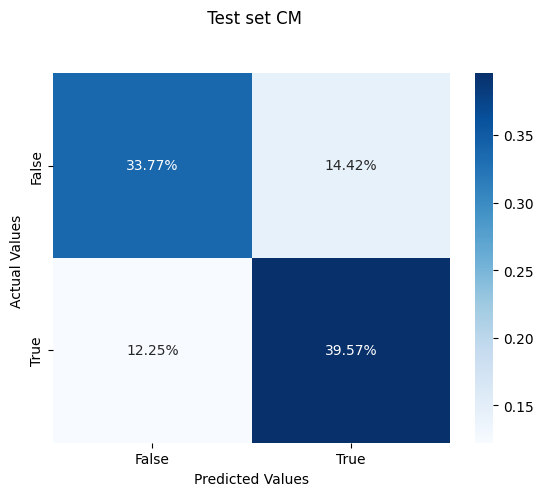

In [8]:
plt.rcParams.update({'font.size': 10})
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()
fig1.savefig('RF_rpdcl_tr3_pr2_v1.pdf', dpi=400)